<a href="https://colab.research.google.com/github/wolfinwallst/Machine_Learning_Deep_basis/blob/main/RL_Lab_04_Q_learning_table_exploit_and_exploration_and_discounted_reward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

In [16]:
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': False}
)

env = gym.make('FrozenLake-v3')

In [17]:
# Initialize table w/ all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
# discount factor
dis = .99
num_episodes = 2000

#  create lists to contain total rewards and steps per episode
rList = []

In [18]:
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    # the Q-table learning algorithm
    while not done:
        # Choose an actino by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (1 + 1))

        # get new state and reward from environment
        new_state, reward, done, _ = env.step(action)

        # update Q-table w/ new knowledge using decay rate
        Q[state, action] = reward + dis * np.max(Q[new_state, :])

        rAll += reward
        state = new_state

    rList.append(rAll)

Success rate: 0.554
Final Q-Table Values
[[0.94148015 0.95099005 0.95099005 0.94148015]
 [0.94148015 0.         0.96059601 0.95099005]
 [0.95099005 0.970299   0.95099005 0.96059601]
 [0.96059601 0.         0.95099005 0.95099005]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.96059601]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.970299   0.99       0.         0.970299  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


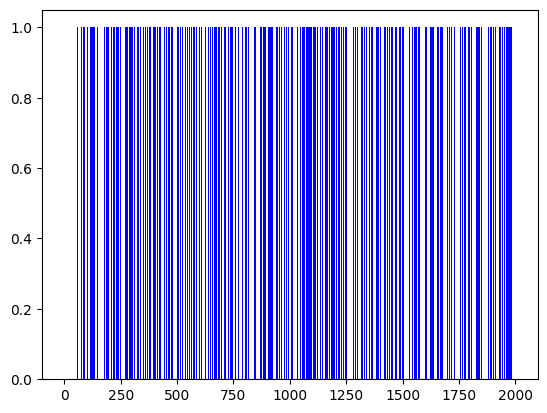

In [19]:
print("Success rate: " + str(sum(rList) / num_episodes))
print('Final Q-Table Values')
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

In [20]:
# e-greedy
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    e = 1. / ((1 // 100) + 1)
    # the Q-table learning algorithm
    while not done:
        # Choose an action by e greedy
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        # get new state and reward from environment
        new_state, reward, done, _ = env.step(action)

        # update Q-table w/ new knowledge using decay rate
        Q[state, action] = reward + dis * np.max(Q[new_state, :])

        rAll += reward
        state = new_state

    rList.append(rAll)

Success rate: 0.573
Final Q-Table Values
[[0.94148015 0.95099005 0.95099005 0.94148015]
 [0.94148015 0.         0.96059601 0.95099005]
 [0.95099005 0.970299   0.95099005 0.96059601]
 [0.96059601 0.         0.95099005 0.95099005]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.96059601]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.970299   0.99       0.         0.970299  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


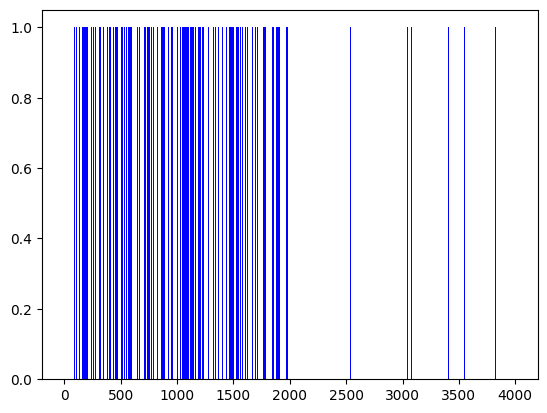

In [21]:
print("Success rate: " + str(sum(rList) / num_episodes))
print('Final Q-Table Values')
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()